<a href="https://colab.research.google.com/github/Vishnunatraj/vishnu-N/blob/main/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
df = pd.read_csv("/content/spam_or_not_spam.csv")

# VERY IMPORTANT: email column la iruka NaN remove / replace
df["email"] = df["email"].fillna("")

df.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [18]:
X = df["email"]   # text emails
y = df["label"]   # 0 or 1 (not spam / spam)


In [19]:
vectorizer = TfidfVectorizer(stop_words="english")
X_vec = vectorizer.fit_transform(X)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)


In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [22]:
# continuous prediction (0–1 range but not exactly)
y_pred_cont = lin_model.predict(X_test)

# convert to 0 / 1
y_pred = (y_pred_cont >= 0.5).astype(int)


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.935

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       505
           1       0.72      0.96      0.82        95

    accuracy                           0.94       600
   macro avg       0.86      0.94      0.89       600
weighted avg       0.95      0.94      0.94       600



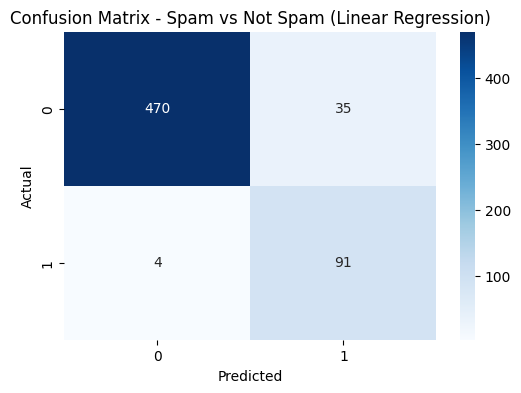

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Spam vs Not Spam (Linear Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
sample_email = ["You won 5 lakh rupees!!! Click here now"]
sample_vec = vectorizer.transform(sample_email)

sample_cont = lin_model.predict(sample_vec)          # continuous
sample_label = int(sample_cont[0] >= 0.5)            # 0 or 1

print("Continuous output:", sample_cont[0])
print("Final prediction (0=Not spam, 1=Spam):", sample_label)


Continuous output: 1.7742956702710035
Final prediction (0=Not spam, 1=Spam): 1
